# Estadística

El objetivo del siguiente notebook es, además de repasar conceptos de estadística, que presten atención a cómo se calculan algunas cosas con Numpy y se hacen gráficos con Matplotlib (¿qué?¿qué es eso? Lo veremos más adelante. Por ahora, solamente tienen que instalar la librería Matplotlib y correr las celdas).


## Distribuciones de probabilidad

El concepto de distribución de probabilidad es un concepto central en probabilidad y estadística y, por lo tanto, hay mucho para decir. Nos limitamos acá a los puntos más importantes.

Comencemos por un ejemplo: un dado de seis caras. La probabilidad de que al tirar el dado *salga* una cara es $1/6$. Si graficamos la probabilidad para cada resultado posible de tirar un dado, obtendríamos un gráfico como el siguiente:

In [4]:
import numpy as np
import matplotlib.pyplot as plt

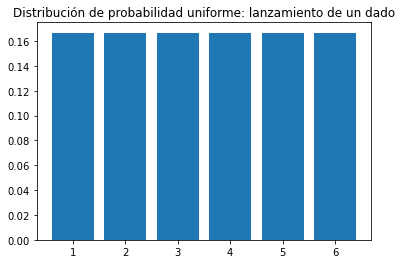

In [5]:
valores = np.arange(1,7)
probas = np.zeros(6) + 1/6
plt.bar(valores, probas)
plt.title('Distribución de probabilidad uniforme: lanzamiento de un dado')
# plt.savefig('distribucion_dado.png', dpi = 400)
plt.show()

En este caso, decimos que la distribución de probabilidad es *uniforme discreta*, ya que le asigna la misma probabilidad a los seis valores que pueden salir al tirar el dado. Si el dado estuviera cargado, ya no sería uniforme.

**Algunos detalles**:
1. El resultado de tirar un dado es un ejemplo de una *variable aleatoria*.
2. En el caso del dado, la variable aleatoria puede tomar valores *discretos* y *acotados* (limitados): 1, 2, 3, 4, 5 y 6
3. Existen variables aleatorias donde los posibles valores que puede tomar son continuos y no acotados. Veremos la distribución más famosa de ellas a continuación.

### Distribución Normal o Gaussiana

La distribución normal o gaussiana debe ser la distribución más famosa dentro de las distribuciones. Es una distribución de variable continua y aparece en una infinidad de ámbitos de la ciencia. Muchas variables asociadas a fenómenos naturales siguen una distribución gaussiana; un ejemplo típico es la estatura de las personas. Recomendamos entrar en la página de Wikipedia y prestar atención a la sección "Propiedades":
https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal

Los dos parámetros de una distribución Gaussiana son: su valor medio $\mu$ y su desviacíon estándar $\sigma$. Estos valores son *teóricos*, es decir, son propios de la distribución de probabilidad. Numpy nos provee de herramientas para generar valores aleatorios de distribuciones normales. A continuación generamos, usando `np.random.normal()`, muestras de dos distribuciones normales, con el mismo valor medio pero distinta desviación estándar. **Consultar** la ayuda de la función para entender bien qué hace.

In [6]:
mu = 2.0
sigma_1 = 5.0
sigma_2 = 2.0
muestras_1 = np.random.normal(loc = mu, scale = sigma_1, size = 400)
muestras_2 = np.random.normal(loc = mu, scale = sigma_2, size = 400)
print(muestras_1, muestras_2)

[ -8.86853629   6.43619689   2.01300716   1.91022131   1.37311836
   4.99927314   6.27964519  -8.72645306  -4.05166996  -1.31442543
   3.02793806   3.38347663   0.52900912   7.52495725  -0.16357011
   0.2843616    2.755446    -2.14719358  -1.69833073   2.16851848
   2.97768299   5.94503639  -0.70145458  -4.72096989   1.63325365
   3.9271499    2.12136151   6.81849651   3.53220362  -1.8951016
   7.38243706   9.02645364   8.19311943  -2.08043686   0.09433292
   4.936664    -1.20715578  -4.13840344   5.99174496   6.68796796
   1.61729006   5.4081278    7.49969223   5.90665779   4.57055796
   0.37735402  -5.9166516   -1.19571084   3.69417974  -4.58282924
   1.88768565   6.82582701   0.18609442   8.94502398  -2.35185678
   5.15129339   7.51864541   4.74559339   1.928588     3.97342039
  -7.74695781  12.17415283  -4.31020717   1.93729207  -2.71590598
   0.18958759   5.03359536   6.3088036    3.58003492   7.54384712
  -0.07123602  -4.89007334   6.23638504  -2.20165828   5.83717191
  -2.456036

Notar que son dos "tiras" de números, bastante largas y que a simple vista no nos dicen mucho. Mejor, podemos graficar su histograma (¿Qué es eso? Nuevamente, lo veremos durante las próximas clases, pero se pueden ir familiarizando).

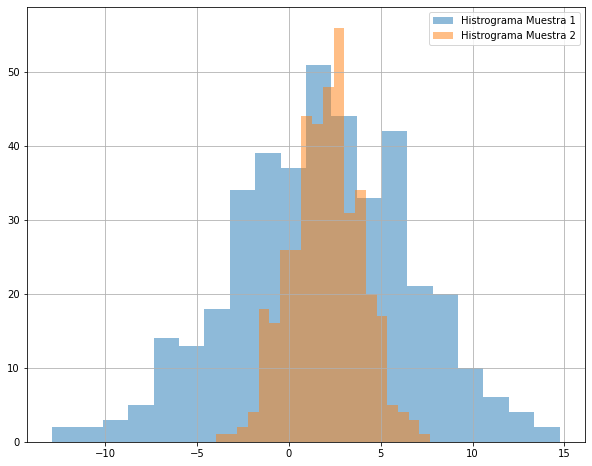

In [7]:
plt.figure(figsize = (10,8))
plt.hist(muestras_1, bins = 20, alpha = 0.5, label = 'Histrograma Muestra 1')
plt.hist(muestras_2, bins = 20, alpha = 0.5, label = 'Histrograma Muestra 2')
plt.legend()
plt.grid()
plt.show()

Volver a "generar" las muestas y hacer sus histogramas. ¿Cambió?¿Por qué?

### Promedio

Dados $n$ números $x_1,x_2,...,x_n$, el promedio o media es 

$$\overline{x} = \frac{1}{n}\sum_{i=1}^{n} x_i = \frac{x_1 + x_2 + ... + x_n}{n}$$

y lo podemos calcular *a mano* con Python

In [8]:
x_s = np.array([1,2,3,1,2,2,3,4,1,2,3,4,1,2,4])
n = len(x_s)

#forma lenta
x_mean = 0
for x in x_s:
    x_mean +=x
x_mean/=n
print(x_mean)

2.3333333333333335


o, mejor, usando Numpy

In [9]:
x_mean = np.mean(x_s)
print(x_mean)

2.3333333333333335


**Comentarios**:
1. Dado un conjunto de números, el promedio suele ser considerado el número más representativo de ese conjunto. Esto no siempre es así. Pensar por qué.
2. Al conjunto de números $x_1,...,x_n$ los pueden encontrar por el nombre de *población* o *muestra* (¡Ojo que no estamos diciendo que *población* y *muestra* sean lo mismo!).


### Desviación Estándar

La desviación estándar nos da una idea de cuán "dispersos" están los valores con respecto a su promedio. En general se usa la letra griega $\sigma$ para representarla (igual que el parámetro $\sigma$ de la distribución normal, ¡pero refieren a cosas distintas - aunque relacionadas!) o las siglas $SD$. Como no queremos que se confundan, preferimos la segunda opción.

$$ SD = \sqrt{\frac{\sum_{i=1}^{n} (x_i -\overline{x})^2}{n - 1}}$$

Numpy, nuevamente, tiene funciones ya incorporadas que calculan la desviación estándar de un arreglo:

In [10]:
x_std = np.std(x_s)
print(x_std)

1.0749676997731399


**Para investigar**: ¿qué es el parámetro `ddof` de esa función?

### Promedio y desviación estándar en una distribución Normal

En una distribución normal, el promedio de las muestras obtenidas *tiende* al valor medio $\mu$ de la distribución, y la desviación estándar *tiende* a la desviacíon estándar $\sigma$ de la distribución. Notar, entonces, que existen valores calculados (promedio, desviación estándar) y valores teóricos ($\mu$ y $\sigma$). Confundirlos entre sí es un error común.

In [11]:
mu = 8.5
sigma = 3.0
muestras = np.random.normal(loc = mu, scale = sigma, size = 400)

In [12]:
print('Valor medio teorico:', mu, '. Valor medio calculado:', muestras.mean())
print('Desviacion estandar teorica:', sigma, '. Desviacion estandar calculada:', muestras.std())

Valor medio teorico: 8.5 . Valor medio calculado: 8.514162854428532
Desviacion estandar teorica: 3.0 . Desviacion estandar calculada: 3.050730699475485


¿Por qué no coinciden?¿Qué podemos hacer para que se parezcan cada vez más?

## Repaso: Estadística con Python/Numpy

Como vimos, en la librería Numpy ya hay funciones que calculan varios *estadísticos* dada una muestra


In [13]:
x_s = np.array([1,2,3,1,2,2,3,4,1,2,3,4,1,2,4])
x_mean = np.mean(x_s) #alternativamente, x_s.mean()
std = np.std(x_s) #alternativamente, x_s.std()
print(x_mean, std)

2.3333333333333335 1.0749676997731399


También hay funciones que generan muestras al azar de una distribución

In [14]:
promedio = 2.0
std = 5.0
muestras_normal = np.random.normal(loc = promedio, scale = std, size = 400)
print(muestras_normal[:10])

[  6.75846551 -12.13216998  -4.22713384   5.34049902  -5.60480894
   5.77689678   2.30137642   9.25795503  -4.54127451   2.42083405]


Y con Matplotlib podemos hacer histogramas

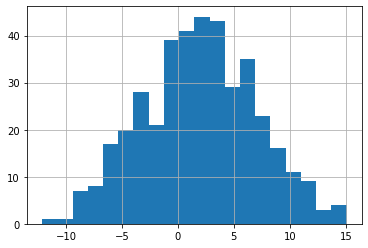

In [15]:
plt.hist(muestras_normal, bins = 20)
plt.grid()
plt.show()

## Ejercicio

¿Cuál será el promedio de los valores obtenidos de tirar muchas veces un dado? Vamos a tratar de responder esta pregunta *simulando* un dado y luego comparar con el valor teórico.

1. Obtener 30 muestras al azar de un dado. No hay una única forma de hacerlo. Pueden googlear o mirar la documentación del módulo *random* de Numpy (https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html). Pista: choice o randint.

In [35]:
muestras = np.random.randint(1,7, size=1000)
print(muestras)

[6 1 4 2 1 6 5 5 6 5 2 3 6 4 1 3 2 6 6 5 6 5 4 4 1 3 6 3 3 4 2 2 6 4 2 2 2
 5 5 4 3 4 2 2 1 4 4 1 3 2 3 1 4 5 2 3 5 6 6 3 2 1 6 1 2 5 3 1 4 1 6 1 2 3
 2 3 5 3 2 3 6 4 4 5 2 5 5 3 4 2 4 1 1 5 5 1 3 1 2 1 2 6 2 1 5 4 5 3 2 1 6
 4 5 3 1 3 4 3 1 1 6 3 3 1 4 5 5 5 5 1 5 6 2 3 1 5 5 4 4 2 6 4 3 5 3 3 2 2
 1 5 5 4 3 3 1 5 6 5 1 4 5 4 6 4 6 1 6 4 1 2 6 4 4 6 2 1 2 1 6 6 5 5 6 6 6
 1 2 4 2 2 4 3 3 5 4 2 6 4 2 4 1 1 5 3 3 3 2 6 5 3 1 1 4 6 5 2 4 5 3 5 1 5
 5 1 5 2 2 2 5 2 4 6 5 1 6 2 4 2 6 5 5 1 3 3 3 6 5 4 4 1 5 1 3 4 5 1 5 4 2
 1 1 5 1 4 6 1 6 4 4 4 5 2 3 3 1 3 5 3 5 4 3 2 2 4 2 5 4 3 4 5 5 4 6 4 1 3
 5 6 6 5 2 2 5 3 6 3 6 4 1 1 2 6 4 5 1 1 3 4 3 2 3 2 4 4 5 1 5 1 2 4 2 2 4
 4 6 2 3 4 5 6 6 2 6 3 4 1 6 4 6 1 1 4 2 6 1 6 1 5 1 6 1 6 1 6 1 3 3 3 2 3
 5 4 2 2 4 2 1 1 5 2 1 3 3 4 1 5 6 3 3 5 5 1 6 5 1 4 2 6 5 5 6 1 5 1 1 5 6
 2 3 1 6 2 5 5 4 4 1 3 2 6 1 3 2 6 5 3 5 3 4 3 6 3 2 1 1 4 6 3 4 1 2 2 2 4
 2 6 1 5 5 2 1 3 5 1 6 6 3 5 1 2 6 3 3 6 5 1 6 6 3 3 6 3 5 5 4 3 4 2 1 2 2
 2 2 1 2 4 5 6 1 1 2 2 5 

2. Hacer el histograma. ¿Se parece a lo que esperaban? Volver esta celda y la anterior, pero obteniendo 1000 muestras.

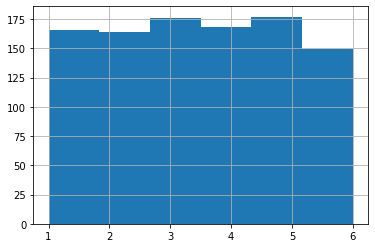

In [36]:
plt.hist(muestras, bins = 6)
plt.grid()
plt.show()

3. Obtener el valor medio y la desviación estándar de la distribución.

In [38]:
x_mean = np.mean(muestras)
std = np.std(muestras)
print(x_mean, std)

3.473 1.6796639544861347


4. Averiguar cuales son los valores *esperados*. ¿Están cerca de los valores que obtuvieron ustedes? Pista: mirar en Wikipedia (en inglés) las propiedades de la distribución uniforme discreta.

5. ¿Cómo se modifica si el dado está *cargado*?. Simular un dado cargado (pueden *cargar* el número que quieran). Pista: choice

In [39]:
# a. Crear un arreglo que asigne probabilidades a cada valor del dado. Recordar que las probabilidades deben sumar 1
probabilidades = muestras/muestras.sum()
# probabilidades = probabilidades/probabilidades.sum() # puede ser util

In [42]:
# b. Generar las muestras
probabilidades

array([0.00172761, 0.00028794, 0.00115174, 0.00057587, 0.00028794,
       0.00172761, 0.00143968, 0.00143968, 0.00172761, 0.00143968,
       0.00057587, 0.00086381, 0.00172761, 0.00115174, 0.00028794,
       0.00086381, 0.00057587, 0.00172761, 0.00172761, 0.00143968,
       0.00172761, 0.00143968, 0.00115174, 0.00115174, 0.00028794,
       0.00086381, 0.00172761, 0.00086381, 0.00086381, 0.00115174,
       0.00057587, 0.00057587, 0.00172761, 0.00115174, 0.00057587,
       0.00057587, 0.00057587, 0.00143968, 0.00143968, 0.00115174,
       0.00086381, 0.00115174, 0.00057587, 0.00057587, 0.00028794,
       0.00115174, 0.00115174, 0.00028794, 0.00086381, 0.00057587,
       0.00086381, 0.00028794, 0.00115174, 0.00143968, 0.00057587,
       0.00086381, 0.00143968, 0.00172761, 0.00172761, 0.00086381,
       0.00057587, 0.00028794, 0.00172761, 0.00028794, 0.00057587,
       0.00143968, 0.00086381, 0.00028794, 0.00115174, 0.00028794,
       0.00172761, 0.00028794, 0.00057587, 0.00086381, 0.00057

In [ ]:
COMPLETAR